## Concordances of DL-parenchymal vs. ground-truth attenuation. 

Figure 4. Concordances of DL-parenchymal vs. ground-truth attenuation. DL-parenchymal attenuation was compared to ground-truth attenuations on partitioned datasets (development set: n=399, internal test set: n=80, external test set: n=535). The scatter plot shows the p value, slope, and Spearman correlation coefficient. The agreement was further assessed using Bland-Altman analysis, with liver attenuations in Hounsfield units (HU) on the x-axis. The bold line represents the actual mean difference (error), and the other two dotted lines show 95% limits of agreements.  

This script derives the concordance of DL-parenchymal attenuation on the development data: 4.a

In [1]:
import pandas as pd

csv_path = '../csv/stats_csv_curated/Liver_attenuation_ROI_vs_seg_all_manual_n_1014.csv'
df_init = pd.read_csv(csv_path)
df_init = df_init[df_init['Partition'] == 'Development']
print(df_init.shape)
df_init.head()

(399, 7)


,Partition,data_set,CT_id,manual_select_roi,manual_seg_roi,manual_seg_3d,manual_seg_2d
100,Development,LIDC_IDRI,LIDC_IDRI_0002,69.21087,70.62760,67.83089,68.75900
101,Development,LIDC_IDRI,LIDC_IDRI_0009,61.29716,62.03824,59.81286,61.57231
102,Development,LIDC_IDRI,LIDC_IDRI_0015,71.16145,69.05653,65.94634,66.63735
103,Development,LIDC_IDRI,LIDC_IDRI_0016,64.89676,63.38155,61.59932,59.15254
104,Development,LIDC_IDRI,LIDC_IDRI_0017,53.58578,51.23857,52.04661,52.83353


In [2]:
import numpy as np
from scipy import stats

data_set_list = list(set(df_init['data_set']))

for set_str in data_set_list:
    df_sub = df_init[df_init['data_set']==set_str]
    print(set_str, df_sub.shape)
    
    density_gd = df_sub['manual_select_roi']
    hs_gd = density_gd[density_gd <40]
    print(len(hs_gd) , len(density_gd), 'hepatic steatosis : %',len(hs_gd) / len(density_gd) * 100)
    
    mean = round(np.mean(density_gd),2)
    std = round(np.std(density_gd),2)
    
    
    print('np.mean',mean, 'np.std',std,'\n\n')


LIDC_IDRI (399, 7)
19 399 hepatic steatosis : % 4.761904761904762
np.mean 60.7 np.std 10.36 




In [3]:

density_col = ['manual_select_roi','manual_seg_roi', 'manual_seg_3d','manual_seg_2d' ] 
density_gd = df_init[density_col[0]]

mean = round(np.mean(density_gd),2)
print('Groudnd-truth attenuation :', density_col[0], 'len:',len(density_gd))
std = round(np.std(density_gd),2)
print(density_col[0],'np.mean',mean, 'np.std',std,'\n\n')

for i in range(1,4):
    density_compare = df_init[density_col[i]]
    print('Liver attenuation of ', density_col[i], 'len:',len(density_compare))
    mean = round(np.mean(density_compare),2)
    std = round(np.std(density_compare),2)
    mse = np.sum(abs(density_compare - density_gd)) / len(density_compare)
    print('np.mean',mean, 'np.std',std, 'mse',round(mse,3))
    
    sp_cor = stats.spearmanr(density_compare,density_gd)
    print('spearman correlation', sp_cor)

    ks_s, ks_p = stats.ks_2samp(density_compare,density_gd)
    if ks_p >0.05:
        print('Liver attenuation of {',density_col[i], density_col[0], '}------ks_p_value',ks_p,' NS NS NS ')
    if ks_p <=0.05:
        print('Liver attenuation of {',density_col[i], density_col[0], '}-----ks_p_value',ks_p,' Significant ')
        
    print('\n\n')

Groudnd-truth attenuation : manual_select_roi len: 399
manual_select_roi np.mean 60.7 np.std 10.36 


Liver attenuation of  manual_seg_roi len: 399
np.mean 60.39 np.std 10.56 mse 2.328
spearman correlation SpearmanrResult(correlation=0.9238946397101975, pvalue=1.0171236498224576e-167)
Liver attenuation of { manual_seg_roi manual_select_roi }------ks_p_value 0.5217787458230605  NS NS NS 



Liver attenuation of  manual_seg_3d len: 399
np.mean 58.77 np.std 9.83 mse 2.563
spearman correlation SpearmanrResult(correlation=0.9455068026467209, pvalue=1.4568806449122409e-195)
Liver attenuation of { manual_seg_3d manual_select_roi }-----ks_p_value 3.498380966173105e-05  Significant 



Liver attenuation of  manual_seg_2d len: 399
np.mean 59.09 np.std 9.57 mse 2.477
spearman correlation SpearmanrResult(correlation=0.9309175446627057, pvalue=9.371178255247018e-176)
Liver attenuation of { manual_seg_2d manual_select_roi }-----ks_p_value 0.00031840265206982795  Significant 





In [4]:
from sklearn import linear_model

col = ['manual_select_roi','manual_seg_roi', 'manual_seg_3d','manual_seg_2d' ] 

density_gd = df_init[col[0]]
density_seg_roi = df_init[col[1]]

model = linear_model.LinearRegression()
x_new = np.array(density_gd).reshape(-1, 1)
y_new = np.array(density_seg_roi).reshape(-1, 1)

model.fit(x_new, y_new )

print('len x', len(x_new), 'len y', len(y_new))
print("slope w：", model.coef_)
print("interception b：", model.intercept_)

len x 399 len y 399
slope w： [[0.96905845]]
interception b： [1.55931325]


<Figure size 1000x1000 with 0 Axes>

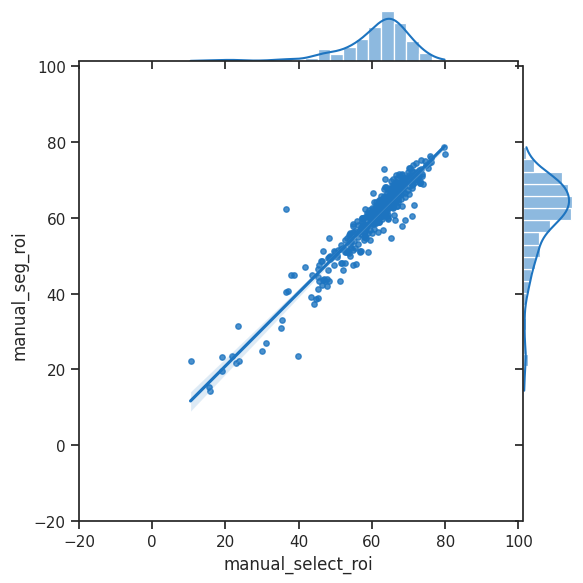

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(rc={"figure.figsize":(10, 10)}) 
sns.set_style("ticks")

sns.despine()

min_lim, max_lim = -20, 100

ax = sns.jointplot(data=df_init, x=col[0], y=col[1] , color = '#1d74c0ff',
              marginal_kws = dict(bins= 20), space = 0.1,ratio = 8
              , xlim=[min_lim, max_lim], ylim=[min_lim, max_lim]
              , kind = 'reg'
              , scatter_kws={'s': 15}
             )
ax.fig.set_size_inches(6,6)
# plt.savefig( 'figures_in_png/joint_plot_' + col[0] + '_' +col[1] +'.png', dpi = 500)


In [7]:
[colgd, colai ]  = ['manual_select_roi','manual_seg_roi']

x_ax = np.array(df_init[colgd])
y_ax = (np.array(df_init[colai]) - np.array(df_init[colgd])) 

std196 = 1.96*np.std((y_ax))
print('Std of difference ',np.std((y_ax)))
print('1.96std of abs difference ',std196)

mean_dif = np.mean((y_ax))
print('Mean of  difference', mean_dif)
print('Mean +1.96std', mean_dif+ std196)
print('Mean -1.96std', mean_dif- std196)

outliers = []
for y_value in y_ax:
    if y_value < mean_dif- std196 or y_value > mean_dif + std196:
        outliers.append(y_value)
print('Len(outliers)',len(outliers), 'Len of all test images',len(y_ax),' = %', len(outliers)/ len(y_ax) *100)

Std of difference  3.2962382692036996
1.96std of abs difference  6.460627007639251
Mean of  difference -0.3189717794486212
Mean +1.96std 6.141655228190629
Mean -1.96std -6.779598787087872
Len(outliers) 21 Len of all test images 399  = % 5.263157894736842


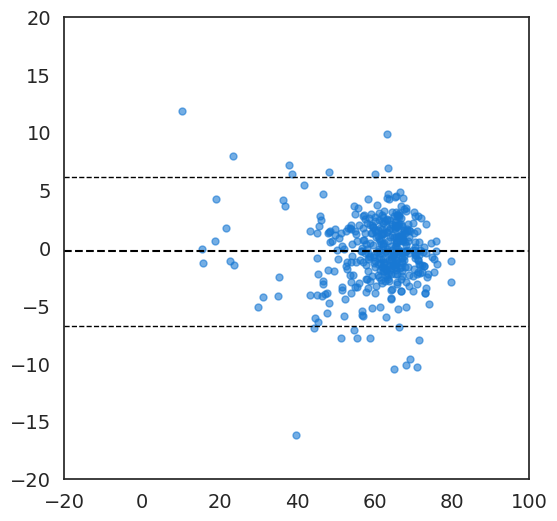

In [9]:
import matplotlib.pyplot as plt
%matplotlib inline

fig, ax = plt.subplots(1, 1, figsize=(6, 6))

min_x, max_x = -20, 100
min_y, max_y = -20,20

ax.plot(x_ax, y_ax, '.', markersize= 10, color='#1878d3ff', alpha = 0.6       )

ax.plot([min_x, max_x], [mean_dif, mean_dif], '--', color='black', linewidth=1.5)
ax.plot([min_x, max_x], [mean_dif+ std196, mean_dif +  std196], '--', color='black', linewidth=1)
ax.plot([min_x, max_x], [mean_dif - std196, mean_dif -  std196], '--', color='black', linewidth= 1)

ax.set_xlim(min_x, max_x)
ax.set_ylim(min_y, max_y)

ax.tick_params(axis='x', which='both', bottom=False, labelbottom=True, labelsize=14)
ax.tick_params(axis='y', which='both', left=False, labelleft=True, labelsize=14)

# plt.savefig( 'figures_in_png/Mean_dif_' + colgd +'.png', dpi = 500)
